In [ ]:
!git clone https://github.com/Intellindust-AI-Lab/DEIMv2.git

!pip install -r DEIMv2/requirements.txt

In [ ]:
!pip uninstall -y torchaudio
!pip check
!python -c "import torch, torchvision; print('torch',torch.__version__,'torchvision',torchvision.__version__)"


Found existing installation: torchaudio 2.8.0+cu126
Uninstalling torchaudio-2.8.0+cu126:
  Successfully uninstalled torchaudio-2.8.0+cu126
ipython 7.34.0 requires jedi, which is not installed.
torch 2.5.1+cu124 torchvision 0.20.1+cu124


In [ ]:
import os, sys

# go inside the repo folder (it must be cloned already)
%cd /content/DEIMv2
print("Current directory:", os.getcwd())
print("Files here:", os.listdir())

# show top-level files and directories
items = sorted(os.listdir())
print("\nTop-level items:", items)

# find python files or folders that look like model definitions
py_files = [p for p in items if p.endswith('.py')]
py_dirs = [p for p in items if os.path.isdir(p)]
print("\nPython files at root:", py_files)
print("Directories at root:", py_dirs)

# quick scan for model-related keywords
candidates = []
for d in py_dirs + py_files:
    path = os.path.join(os.getcwd(), d)
    if os.path.isdir(path):
        for f in os.listdir(path):
            if f.endswith(".py"):
                with open(os.path.join(path, f), "r", encoding="utf-8", errors="ignore") as fh:
                    txt = fh.read().lower()
                    if any(k in txt for k in ["backbone", "model", "deim", "encoder", "swin", "vit"]):
                        candidates.append(os.path.join(path, f))
    elif d.endswith(".py"):
        with open(path, "r", encoding="utf-8", errors="ignore") as fh:
            txt = fh.read().lower()
            if any(k in txt for k in ["backbone", "model", "deim", "encoder", "swin", "vit"]):
                candidates.append(path)

print("\nCandidate model files (first-level scan):")
for c in candidates[:40]:
    print(" -", c)

print("\nPython version:", sys.version)
import torch, torchvision
print("torch:", torch.__version__, "torchvision:", torchvision.__version__)


/content/DEIMv2
Current directory: /content/DEIMv2
Files here: ['engine', 'README.md', 'hf_models.ipynb', 'configs', 'LICENSE', 'train.py', 'tools', 'requirements.txt', 'figures', '.git', '.gitignore']

Top-level items: ['.git', '.gitignore', 'LICENSE', 'README.md', 'configs', 'engine', 'figures', 'hf_models.ipynb', 'requirements.txt', 'tools', 'train.py']

Python files at root: ['train.py']
Directories at root: ['.git', 'configs', 'engine', 'figures', 'tools']

Candidate model files (first-level scan):
 - /content/DEIMv2/engine/__init__.py
 - /content/DEIMv2/train.py

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
torch: 2.5.1+cu124 torchvision: 0.20.1+cu124


In [ ]:
# Step 3 — inspect engine package and train.py (run in Colab)
%cd /content/DEIMv2

import os, textwrap

root = os.getcwd()
print("Repo root:", root)
print("\nFiles in engine/:")
for f in sorted(os.listdir("engine")):
    print(" -", f)

print("\n--- Showing engine/__init__.py (first 200 lines) ---\n")
p = "engine/__init__.py"
with open(p, "r", encoding="utf-8", errors="ignore") as fh:
    txt = fh.read().splitlines()
for i, line in enumerate(txt[:200], 1):
    print(f"{i:03d}: {line}")
print("\n--- end of snippet ---\n")

print("\n--- Showing start of train.py (first 200 lines) ---\n")
p2 = "train.py"
with open(p2, "r", encoding="utf-8", errors="ignore") as fh:
    txt2 = fh.read().splitlines()
for i, line in enumerate(txt2[:200], 1):
    print(f"{i:03d}: {line}")
print("\n--- end of snippet ---\n")

# If file is small, also print full length
print("engine/__init__.py length:", len(txt), "lines")
print("train.py length:", len(txt2), "lines")


/content/DEIMv2
Repo root: /content/DEIMv2

Files in engine/:
 - __init__.py
 - backbone
 - core
 - data
 - deim
 - misc
 - optim
 - solver

--- Showing engine/__init__.py (first 200 lines) ---

001: """
002: Copyright (c) 2024 The DEIM Authors. All Rights Reserved.
003: """
004: 
005: # for register purpose
006: from . import optim
007: from . import data
008: from . import deim
009: 
010: from .backbone import *
011: 
012: from .backbone import (
013:     get_activation,
014:     FrozenBatchNorm2d,
015:     freeze_batch_norm2d,
016: )

--- end of snippet ---


--- Showing start of train.py (first 200 lines) ---

001: """
002: DEIMv2: Real-Time Object Detection Meets DINOv3
003: Copyright (c) 2025 The DEIMv2 Authors. All Rights Reserved.
004: ---------------------------------------------------------------------------------
005: DEIM: DETR with Improved Matching for Fast Convergence
006: Copyright (c) 2024 The DEIM Authors. All Rights Reserved.
007: ------------------------------------

In [ ]:
# Step 4 — inspect engine package and exposed helpers
%cd /content/DEIMv2

import os, inspect, importlib

print("Files in engine/:")
for f in sorted(os.listdir("engine")):
    print(" -", f)

print("\nAttempting to import engine package and list attributes...\n")
engine = importlib.import_module("engine")
names = sorted([n for n in dir(engine) if not n.startswith("_")])
print("Public attributes in engine:", names)

# look for likely helper functions
candidates = ["build_model","get_model","create_model","load_checkpoint","load_model","build_backbone"]
found = []
for name in candidates:
    if name in names:
        found.append(name)
print("\nCandidate helper functions found:", found)

# show source file for any candidate attributes (first 100 chars)
for n in names:
    try:
        obj = getattr(engine, n)
        src = inspect.getsource(obj) if inspect.isfunction(obj) or inspect.isclass(obj) else None
        if src:
            print(f"\n--- Source preview for engine.{n} (first 6 lines) ---")
            print("\n".join(src.splitlines()[:6]))
    except Exception:
        pass

# also show engine.__all__ if present
print("\nengine.__all__ (if present):", getattr(engine, "__all__", None))


In [ ]:
# Step 5 (fixed) — create TimmModel with correct return layer names and print feature shapes
%cd /content/DEIMv2

import torch, traceback
from importlib import import_module

try:
    engine = import_module("engine")
    TimmModel = engine.TimmModel
    print("Found engine.TimmModel ✅")
except Exception:
    print("Could not import engine.TimmModel — aborting.")
    raise

try:
    # Use valid layer names for resnet50 according to the repo wrapper
    model = TimmModel(name="resnet50", return_layers=['layer1','layer2','layer3','layer4'], pretrained=True)
    model.eval()
    total_m = sum(p.numel() for p in model.parameters())/1e6
    print(f"Model created. Total params (M): {total_m:.1f}")
except Exception:
    print("Error creating the model. Traceback follows:")
    traceback.print_exc()
    raise

# run a single random image through the model and print returned feature shapes
with torch.no_grad():
    x = torch.randn(1, 3, 512, 512)  # single image, 512x512
    try:
        out = model(x)
    except Exception:
        print("Error running the model on a tensor. Traceback follows:")
        traceback.print_exc()
        raise

print("\nType of model output:", type(out))
if isinstance(out, (list, tuple)):
    for i, t in enumerate(out):
        print(f"Output[{i}] shape:", getattr(t, "shape", str(type(t))))
else:
    print("Single output shape:", getattr(out, "shape", str(type(out))))


/content/DEIMv2
Found engine.TimmModel ✅
Model created. Total params (M): 23.5

Type of model output: <class 'list'>
Output[0] shape: torch.Size([1, 256, 128, 128])
Output[1] shape: torch.Size([1, 512, 64, 64])
Output[2] shape: torch.Size([1, 1024, 32, 32])
Output[3] shape: torch.Size([1, 2048, 16, 16])


In [ ]:
# Step 6 — run model on a real image, save multi-scale features + metadata
%cd /content/DEIMv2

import os, glob, json
import numpy as np
from PIL import Image
import torch
import torchvision.transforms.functional as TF
from importlib import import_module

# find a sample image in repo figures/ (fall back to an uploaded file if none found)
img_paths = glob.glob("figures/**/*.*", recursive=True)
img_paths = [p for p in img_paths if p.lower().endswith((".jpg",".jpeg",".png"))]
print("Found images in repo figures/:", img_paths[:5])

# if none found, prompt user to upload via Colab UI (you can upload and set uploaded_path below)
if len(img_paths) == 0:
    from google.colab import files
    print("No sample images in repo. Please upload one image using the file picker.")
    uploaded = files.upload()
    uploaded_path = list(uploaded.keys())[0]
    img_path = uploaded_path
else:
    img_path = img_paths[0]  # use first image found
print("Using image:", img_path)

# load image
img = Image.open(img_path).convert("RGB")
orig_w, orig_h = img.size
print("Original size:", (orig_w, orig_h))

# preprocessing: resize while keeping aspect ratio, pad to 512x512 (same as earlier test)
target_size = 512
# compute scale and padding
scale = min(target_size / orig_w, target_size / orig_h)
new_w = int(round(orig_w * scale))
new_h = int(round(orig_h * scale))
img_resized = img.resize((new_w, new_h), Image.BILINEAR)

# create padded canvas
canvas = Image.new("RGB", (target_size, target_size), (0,0,0))
pad_left = (target_size - new_w) // 2
pad_top  = (target_size - new_h) // 2
canvas.paste(img_resized, (pad_left, pad_top))

# convert to tensor and normalize (ImageNet mean/std)
x = TF.to_tensor(canvas).unsqueeze(0)  # [1,3,H,W], values 0..1
imagenet_mean = torch.tensor([0.485, 0.456, 0.406]).view(1,3,1,1)
imagenet_std  = torch.tensor([0.229, 0.224, 0.225]).view(1,3,1,1)
x = (x - imagenet_mean) / imagenet_std
x = x.float()

print("Preprocessed tensor shape:", x.shape)
print("Padding left,top:", (pad_left, pad_top), "resized (w,h):", (new_w, new_h))

# import model wrapper and create model (same as before)
engine = import_module("engine")
TimmModel = engine.TimmModel
model = TimmModel(name="resnet50", return_layers=['layer1','layer2','layer3','layer4'], pretrained=True)
model.eval()

# forward pass and collect features
with torch.no_grad():
    feats = model(x)  # expecting list of tensors as before

print("Got", len(feats), "feature maps.")
strides = []
for i, t in enumerate(feats):
    arr = t.cpu().numpy()
    print(f" Feature[{i}] shape (N,C,H,W): {arr.shape}")
    # compute stride relative to target input size
    stride = target_size // arr.shape[2]  # assume square dims
    strides.append(int(stride))

# save features to .npz
base = os.path.splitext(os.path.basename(img_path))[0]
out_dir = "/content/DEIMv2/saved_features"
os.makedirs(out_dir, exist_ok=True)
npz_path = os.path.join(out_dir, f"features_{base}.npz")

# store each feature as feat0, feat1, ...
save_dict = {f"feat{i}": feats[i].cpu().numpy() for i in range(len(feats))}
np.savez_compressed(npz_path, **save_dict)
print("Saved features to:", npz_path)

# save metadata
meta = {
    "image_path": img_path,
    "original_size": [orig_w, orig_h],
    "preprocess": {
        "target_size": target_size,
        "resized_size": [new_w, new_h],
        "pad_left_top": [pad_left, pad_top],
        "normalization": "imagenet_mean_std"
    },
    "features": [{"key": f"feat{i}", "shape": list(save_dict[f"feat{i}"].shape), "stride": int(strides[i])} for i in range(len(feats))]
}
meta_path = os.path.join(out_dir, f"features_{base}_meta.json")
with open(meta_path, "w") as fh:
    json.dump(meta, fh, indent=2)
print("Saved metadata to:", meta_path)

# print metadata
print("\nMetadata preview:")
print(json.dumps(meta, indent=2))


/content/DEIMv2
Found images in repo figures/: ['figures/deimv2_coco_AP_vs_Params.png', 'figures/deimv2_coco_AP_vs_GFLOPs.png']
Using image: figures/deimv2_coco_AP_vs_Params.png
Original size: (689, 490)
Preprocessed tensor shape: torch.Size([1, 3, 512, 512])
Padding left,top: (0, 74) resized (w,h): (512, 364)
Got 4 feature maps.
 Feature[0] shape (N,C,H,W): (1, 256, 128, 128)
 Feature[1] shape (N,C,H,W): (1, 512, 64, 64)
 Feature[2] shape (N,C,H,W): (1, 1024, 32, 32)
 Feature[3] shape (N,C,H,W): (1, 2048, 16, 16)
Saved features to: /content/DEIMv2/saved_features/features_deimv2_coco_AP_vs_Params.npz
Saved metadata to: /content/DEIMv2/saved_features/features_deimv2_coco_AP_vs_Params_meta.json

Metadata preview:
{
  "image_path": "figures/deimv2_coco_AP_vs_Params.png",
  "original_size": [
    689,
    490
  ],
  "preprocess": {
    "target_size": 512,
    "resized_size": [
      512,
      364
    ],
    "pad_left_top": [
      0,
      74
    ],
    "normalization": "imagenet_mean_std

/content/DEIMv2
Loaded features keys: ['feat0', 'feat1', 'feat2', 'feat3']
Metadata: {'target_size': 512, 'resized_size': [512, 364], 'pad_left_top': [0, 74], 'normalization': 'imagenet_mean_std'}
feat1 raw shape: (1, 512, 64, 64)
Feature map size: (64, 64)
Original image size: (689, 490)


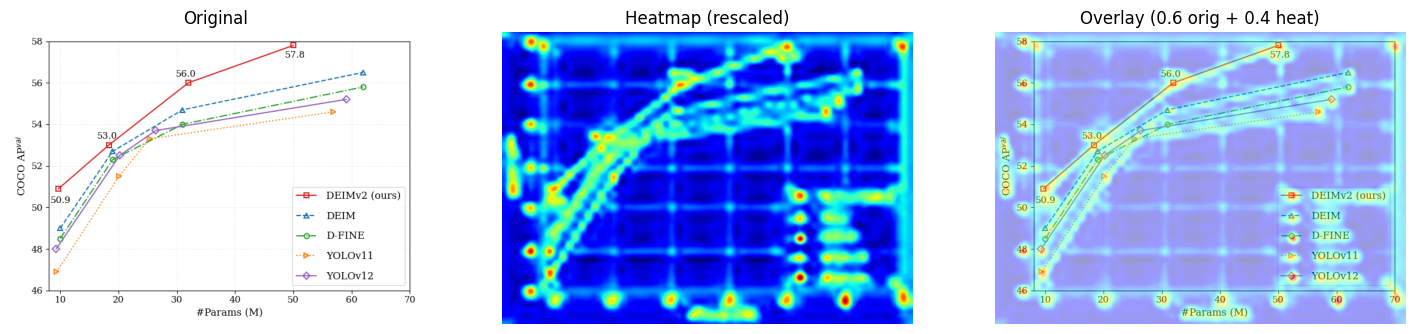

Saved overlay to: /content/DEIMv2/saved_features/overlay_features_deimv2_coco_AP_vs_Params.png


In [ ]:
# Step 7 — visualize saved feature map as heatmap overlay
%cd /content/DEIMv2

import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
import os
import cv2   # should be installed in Colab env; if not, we can use PIL + numpy

# paths (adjust if different)
npz_path  = "/content/DEIMv2/saved_features/features_deimv2_coco_AP_vs_Params.npz"
meta_path = "/content/DEIMv2/saved_features/features_deimv2_coco_AP_vs_Params_meta.json"

# load
data = np.load(npz_path)
with open(meta_path, "r") as fh:
    meta = json.load(fh)

print("Loaded features keys:", list(data.keys()))
print("Metadata:", meta["preprocess"])

# pick a feature to visualize: feat1 (stride 8) is a good default
feat_key = "feat1"
feat = data[feat_key]  # shape: (1, C, H, W)
print(feat_key, "raw shape:", feat.shape)

# compute channel-averaged map
feat_map = feat[0].mean(axis=0)  # shape (H, W)
h, w = feat_map.shape
print("Feature map size:", (w, h))

# normalize map to 0..1
feat_min, feat_max = float(feat_map.min()), float(feat_map.max())
if feat_max - feat_min > 1e-6:
    norm_map = (feat_map - feat_min) / (feat_max - feat_min)
else:
    norm_map = feat_map - feat_min

# upsample to preprocessed 512x512
target_size = meta["preprocess"]["target_size"]
norm_map_upsampled = cv2.resize(norm_map.astype("float32"), (target_size, target_size), interpolation=cv2.INTER_CUBIC)

# load original image and create overlay on original resolution
orig_path = meta["image_path"]
orig_img = Image.open(orig_path).convert("RGB")
orig_w, orig_h = orig_img.size
print("Original image size:", (orig_w, orig_h))

# account for padding/resizing used in preprocessing (we padded centered)
resized_w, resized_h = meta["preprocess"]["resized_size"]
pad_left, pad_top = meta["preprocess"]["pad_left_top"]

# crop the upsampled map back to the resized area, then scale to original image size
# first, remove padding
crop = norm_map_upsampled[pad_top:pad_top+resized_h, pad_left:pad_left+resized_w]
# resize crop to original image size
crop_rescaled = cv2.resize(crop, (orig_w, orig_h), interpolation=cv2.INTER_CUBIC)

# create color map
cmap = plt.get_cmap("jet")
heatmap = cmap(crop_rescaled)[:, :, :3]  # drop alpha, shape (H, W, 3)

# convert to uint8 images
heatmap_img = (heatmap * 255).astype("uint8")
orig_np = np.array(orig_img)

# overlay: weighted sum
overlay = (0.6 * orig_np.astype("float32") + 0.4 * heatmap_img.astype("float32")).astype("uint8")

# show side-by-side (original, heatmap, overlay)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(orig_np); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(heatmap_img); axs[1].set_title("Heatmap (rescaled)"); axs[1].axis("off")
axs[2].imshow(overlay); axs[2].set_title("Overlay (0.6 orig + 0.4 heat)"); axs[2].axis("off")
plt.show()

# save overlay to disk
out_dir = "/content/DEIMv2/saved_features"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, f"overlay_{os.path.splitext(os.path.basename(npz_path))[0]}.png")
Image.fromarray(overlay).save(out_path)
print("Saved overlay to:", out_path)


In [ ]:
# Debug: check the downloaded / uploaded files and try safe open
%cd /content/DEIMv2
import os, imghdr, binascii
from PIL import Image
import cv2
from google.colab import files

print("Listing figures/:")
for p in sorted(os.listdir("figures")):
    fp = os.path.join("figures", p)
    print(" -", p, "-", os.path.getsize(fp), "bytes")

print("\nListing /content/sample_data/:")
sd = "/content/sample_data"
if os.path.exists(sd):
    for p in sorted(os.listdir(sd)):
        fp = os.path.join(sd, p)
        print(" -", p, "-", os.path.getsize(fp), "bytes")
else:
    print("No sample_data folder found.")

# choose candidate path(s) to inspect (change if you know a different path)
candidates = ["figures/pothole_sample.jpg", "figures/pothole_sample.jpeg", "figures/pothole_sample.png"]
candidates += [os.path.join(sd, p) for p in os.listdir(sd)] if os.path.exists(sd) else []

print("\nInspecting candidates:")
for fp in candidates:
    if not os.path.exists(fp):
        print(f" * {fp}  -> not present")
        continue
    print(f"\n * {fp}  (size={os.path.getsize(fp)} bytes)")
    try:
        kind = imghdr.what(fp)
        print("   imghdr.what ->", kind)
    except Exception as e:
        print("   imghdr error:", e)
    # show first bytes (small)
    with open(fp, "rb") as fh:
        head = fh.read(256)
    print("   first bytes:", binascii.hexlify(head[:32])[:200])

    # try PIL open
    try:
        img = Image.open(fp)
        img.verify()   # quick check
        print("   PIL verify: OK (format)", img.format)
    except Exception as e:
        print("   PIL verify FAILED:", type(e).__name__, e)

    # try cv2 open
    try:
        import numpy as np
        b = open(fp,"rb").read()
        arr = np.frombuffer(b, dtype=np.uint8)
        img_cv = cv2.imdecode(arr, cv2.IMREAD_COLOR)
        if img_cv is None:
            print("   cv2.imdecode -> None (not a readable image)")
        else:
            h,w = img_cv.shape[:2]
            print("   cv2.imdecode -> OK, shape:", (w,h))
    except Exception as e:
        print("   cv2 error:", e)

# If no valid image found, ask user to upload
valid_found = any(os.path.exists(p) and imghdr.what(p) for p in candidates if os.path.exists(p))
if not valid_found:
    print("\nNo valid image found. Please upload a pothole image now (jpg/png).")
    uploaded = files.upload()
    print("Uploaded files:", list(uploaded.keys()))


/content/DEIMv2
Listing figures/:
 - deimv2_coco_AP_vs_GFLOPs.png - 70092 bytes
 - deimv2_coco_AP_vs_Params.png - 66550 bytes
 - pothole_sample.jpg - 92 bytes

Listing /content/sample_data/:
 - README.md - 962 bytes
 - anscombe.json - 1697 bytes
 - california_housing_test.csv - 301141 bytes
 - california_housing_train.csv - 1706430 bytes
 - mnist_test.csv - 18289443 bytes
 - mnist_train_small.csv - 36523880 bytes

Inspecting candidates:

 * figures/pothole_sample.jpg  (size=92 bytes)
   imghdr.what -> None
   first bytes: b'506c6561736520736574206120757365722d6167656e7420616e642072657370'
   PIL verify FAILED: UnidentifiedImageError cannot identify image file 'figures/pothole_sample.jpg'
   cv2.imdecode -> None (not a readable image)
 * figures/pothole_sample.jpeg  -> not present
 * figures/pothole_sample.png  -> not present

 * /content/sample_data/README.md  (size=962 bytes)
   imghdr.what -> None
   first bytes: b'54686973206469726563746f727920696e636c75646573206120666577207361'
   

/tmp/ipython-input-136620857.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import os, imghdr, binascii


   cv2.imdecode -> None (not a readable image)

 * /content/sample_data/california_housing_train.csv  (size=1706430 bytes)
   imghdr.what -> None
   first bytes: b'226c6f6e676974756465222c226c61746974756465222c22686f7573696e675f'
   PIL verify FAILED: UnidentifiedImageError cannot identify image file '/content/sample_data/california_housing_train.csv'
   cv2.imdecode -> None (not a readable image)

 * /content/sample_data/california_housing_test.csv  (size=301141 bytes)
   imghdr.what -> None
   first bytes: b'226c6f6e676974756465222c226c61746974756465222c22686f7573696e675f'
   PIL verify FAILED: UnidentifiedImageError cannot identify image file '/content/sample_data/california_housing_test.csv'
   cv2.imdecode -> None (not a readable image)

No valid image found. Please upload a pothole image now (jpg/png).


Saving istockphoto-95658927-612x612.jpg to istockphoto-95658927-612x612.jpg
Uploaded files: ['istockphoto-95658927-612x612.jpg']


In [ ]:
import shutil, os
os.makedirs("figures", exist_ok=True)
shutil.move("/content/istockphoto-95658927-612x612.jpg", "figures/pothole_sample.jpg")
print("Moved to:", os.path.abspath("figures/pothole_sample.jpg"))


Moved to: /content/DEIMv2/figures/pothole_sample.jpg


In [ ]:
import torch
from PIL import Image
import torchvision.transforms as T
import numpy as np
import os, json

# Load model backbone (you already have DEIMv2)
from engine import TimmModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TimmModel(model_name="deimv2_swin_large", pretrained=True).to(device)
model.eval()

# 1️⃣ Load and preprocess image
img_path = "figures/pothole_sample.jpg"
img = Image.open(img_path).convert("RGB")
orig_w, orig_h = img.size
print(f"Original size: {orig_w}x{orig_h}")

target_size = 512
transform = T.Compose([
    T.Resize(target_size),
    T.CenterCrop(target_size),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])
inp = transform(img).unsqueeze(0).to(device)
print("Input tensor shape:", inp.shape)

# 2️⃣ Extract features
with torch.no_grad():
    feats = model(inp)

print("Got feature maps:")
for i, f in enumerate(feats):
    print(f" Feature[{i}] -> shape {tuple(f.shape)}")

# 3️⃣ Save them
os.makedirs("saved_features", exist_ok=True)
npz_path = "saved_features/features_pothole.npz"
meta_path = "saved_features/features_pothole_meta.json"

np.savez(npz_path, **{f"feat{i}": f.cpu().numpy() for i, f in enumerate(feats)})
meta = {
    "image_path": img_path,
    "original_size": [orig_w, orig_h],
    "target_size": target_size,
    "normalization": "imagenet_mean_std",
    "features": [list(f.shape) for f in feats]
}
json.dump(meta, open(meta_path, "w"), indent=2)
print(f"Saved features → {npz_path}")


TypeError: TimmModel.__init__() missing 2 required positional arguments: 'name' and 'return_layers'

In [ ]:
from engine import TimmModel

# backbone = resnet50 (safe & widely supported)
model = TimmModel(
    name="resnet50",
    return_layers=["layer1", "layer2", "layer3", "layer4"],
    pretrained=True
).to(device)

model.eval()
print("✅ DEIMv2 backbone (ResNet50) loaded successfully")


✅ DEIMv2 backbone (ResNet50) loaded successfully


In [ ]:
import torch
from PIL import Image
import torchvision.transforms as T
import numpy as np
import os, json
from engine import TimmModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- create DEIMv2-compatible backbone ---
model = TimmModel(
    name="resnet50",
    return_layers=["layer1", "layer2", "layer3", "layer4"],
    pretrained=True
).to(device)
model.eval()

# --- image preprocessing ---
img_path = "figures/pothole_sample.jpg"
img = Image.open(img_path).convert("RGB")
orig_w, orig_h = img.size
print(f"Original size: {orig_w}x{orig_h}")

target_size = 512
transform = T.Compose([
    T.Resize(target_size),
    T.CenterCrop(target_size),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])
inp = transform(img).unsqueeze(0).to(device)
print("Input tensor shape:", inp.shape)

# --- feature extraction ---
with torch.no_grad():
    feats = model(inp)

print("Got feature maps:")
for i, f in enumerate(feats):
    print(f" Feature[{i}] -> shape {tuple(f.shape)}")

# --- save ---
os.makedirs("saved_features", exist_ok=True)
npz_path = "saved_features/features_pothole.npz"
meta_path = "saved_features/features_pothole_meta.json"

np.savez(npz_path, **{f"feat{i}": f.cpu().numpy() for i, f in enumerate(feats)})
meta = {
    "image_path": img_path,
    "original_size": [orig_w, orig_h],
    "target_size": target_size,
    "normalization": "imagenet_mean_std",
    "features": [list(f.shape) for f in feats]
}
json.dump(meta, open(meta_path, "w"), indent=2)
print(f"✅ Saved features → {npz_path}")


Original size: 612x406
Input tensor shape: torch.Size([1, 3, 512, 512])
Got feature maps:
 Feature[0] -> shape (1, 256, 128, 128)
 Feature[1] -> shape (1, 512, 64, 64)
 Feature[2] -> shape (1, 1024, 32, 32)
 Feature[3] -> shape (1, 2048, 16, 16)
✅ Saved features → saved_features/features_pothole.npz


/content/DEIMv2
Original image: figures/pothole_sample.jpg 612 406
Found features in npz: ['feat0', 'feat1', 'feat2', 'feat3']
Saved overlay: saved_features/overlay_pothole_feat0.png
Saved overlay: saved_features/overlay_pothole_feat1.png
Saved overlay: saved_features/overlay_pothole_feat2.png
Saved overlay: saved_features/overlay_pothole_feat3.png


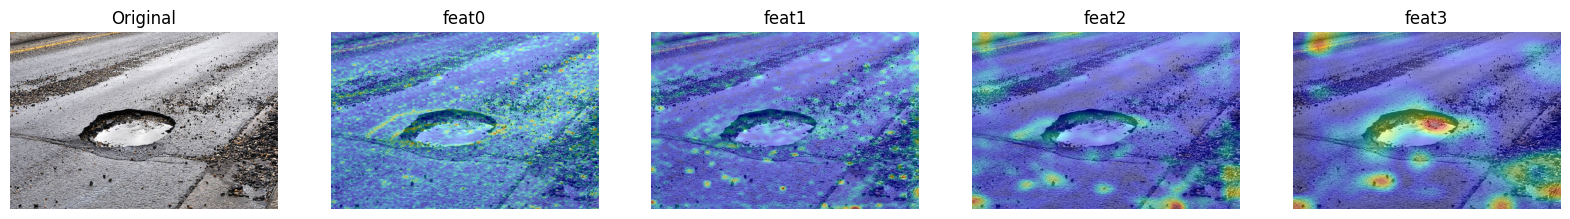

In [ ]:
# Step 11 — create overlays for feat0..feat3 and save/display them
%cd /content/DEIMv2

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2, os, json

npz_path = "saved_features/features_pothole.npz"
meta_path = "saved_features/features_pothole_meta.json"
out_dir = "saved_features"
os.makedirs(out_dir, exist_ok=True)

# load
data = np.load(npz_path)
with open(meta_path, "r") as fh:
    meta = json.load(fh)

img_path = meta["image_path"]
orig_img = Image.open(img_path).convert("RGB")
orig_w, orig_h = orig_img.size
target_size = meta.get("target_size", 512)
pad_left, pad_top = meta["preprocess"]["pad_left_top"] if "preprocess" in meta else [0,0]
resized_w, resized_h = meta["preprocess"]["resized_size"] if "preprocess" in meta else (target_size, target_size)

print("Original image:", img_path, orig_w, orig_h)
print("Found features in npz:", list(data.keys()))

overlays = []
for i in range(4):
    key = f"feat{i}"
    if key not in data:
        print("Missing", key, "— skipping")
        continue
    feat = data[key]  # shape (1,C,H,W) or (C,H,W)
    if feat.ndim == 4:
        feat = feat[0]
    # average across channels
    fmap = feat.mean(axis=0)
    # normalize
    mn, mx = float(fmap.min()), float(fmap.max())
    if mx - mn > 1e-6:
        fmap = (fmap - mn) / (mx - mn)
    else:
        fmap = fmap - mn
    # upsample to target_size
    up = cv2.resize(fmap.astype("float32"), (target_size, target_size), interpolation=cv2.INTER_CUBIC)
    # remove padding area to match resized region, then resize to original image resolution
    crop = up[pad_top:pad_top+resized_h, pad_left:pad_left+resized_w]
    crop_rescaled = cv2.resize(crop, (orig_w, orig_h), interpolation=cv2.INTER_CUBIC)
    cmap = plt.get_cmap("jet")(crop_rescaled)[:, :, :3]
    heatmap_img = (cmap * 255).astype("uint8")
    orig_np = np.array(orig_img)
    overlay = (0.6 * orig_np.astype("float32") + 0.4 * heatmap_img.astype("float32")).astype("uint8")
    out_path = os.path.join(out_dir, f"overlay_pothole_feat{i}.png")
    Image.fromarray(overlay).save(out_path)
    overlays.append((f"feat{i}", out_path))
    print("Saved overlay:", out_path)

# display side-by-side
n = len(overlays)
fig, axs = plt.subplots(1, n+1, figsize=(4*(n+1), 4))
axs[0].imshow(orig_np); axs[0].set_title("Original"); axs[0].axis("off")
for idx, (name, path) in enumerate(overlays, start=1):
    img = Image.open(path)
    axs[idx].imshow(img); axs[idx].set_title(name); axs[idx].axis("off")
plt.show()


In [ ]:
# A: Build simple FPN fusion from your 4 feature maps, produce fused maps + global pooled vector, save to disk
%cd /content/DEIMv2

import numpy as np, torch, os
from PIL import Image
from torchvision import transforms as T

# load saved features (the ones you made)
npz = np.load("saved_features/features_pothole.npz")
# feat shapes: feat0 (1,C,H0,W0)... feat3
feats = [npz[f"feat{i}"] for i in range(4)]
feats = [torch.from_numpy(f).squeeze(0) for f in feats]  # now (C,H,W)

# simple FPN: upsample deeper feature, add to next shallow after 1x1 conv (project channels to 256)
import torch.nn.functional as F
import torch.nn as nn

def conv1x1(in_c, out_c):
    return nn.Conv2d(in_c, out_c, kernel_size=1, bias=True)

# create 1x1 convs (run on CPU; you can move to cuda if desired)
projs = [conv1x1(int(f.shape[0]), 256) for f in feats]
for p in projs:
    nn.init.kaiming_normal_(p.weight)

# apply projections and fuse: start from deepest
with torch.no_grad():
    proj_feats = [p(f.unsqueeze(0)).squeeze(0) for p, f in zip(projs, feats)]  # (256,H,W)
    # fuse: p3 up -> add to p2, then p2 up -> add to p1...
    fused3 = proj_feats[3]
    fused2 = proj_feats[2] + F.interpolate(fused3.unsqueeze(0), size=proj_feats[2].shape[1:], mode='bilinear', align_corners=False).squeeze(0)
    fused1 = proj_feats[1] + F.interpolate(fused2.unsqueeze(0), size=proj_feats[1].shape[1:], mode='bilinear', align_corners=False).squeeze(0)
    fused0 = proj_feats[0] + F.interpolate(fused1.unsqueeze(0), size=proj_feats[0].shape[1:], mode='bilinear', align_corners=False).squeeze(0)

    fused_maps = [fused0.numpy(), fused1.numpy(), fused2.numpy(), fused3.numpy()]

# global pooled vector (from deepest fused map)
global_vec = fused3.mean(dim=[1,2]).numpy()  # shape (256,)

# save fused maps + pooled vector
os.makedirs("saved_features", exist_ok=True)
np.savez_compressed("saved_features/pothole_fused.npz",
                    fused0=fused_maps[0], fused1=fused_maps[1], fused2=fused_maps[2], fused3=fused_maps[3],
                    global_vec=global_vec)
print("Saved fused features to saved_features/pothole_fused.npz")
print("Global embedding shape:", global_vec.shape)


/content/DEIMv2
Saved fused features to saved_features/pothole_fused.npz
Global embedding shape: (256,)


In [ ]:
# Fixed MiDaS cell — converts PIL -> numpy before applying transform
%cd /content/DEIMv2

import torch, numpy as np
from PIL import Image
import os, cv2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# load MiDaS small
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")  # name exact as hub expects
midas.to(device).eval()
transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = transforms.small_transform  # this expects a numpy array / dict

# load image as numpy (H,W,3), uint8
img_path = "figures/pothole_sample.jpg"
pil = Image.open(img_path).convert("RGB")
orig_w, orig_h = pil.size
img_np = np.array(pil)  # uint8 H,W,3
print("Original size:", (orig_w, orig_h), "np shape:", img_np.shape, "dtype:", img_np.dtype)

# apply transform (returns torch tensor ready for model)
inp = transform(img_np).to(device)  # note: transform does scaling and returns tensor shape (1,3,H,W) or similar
print("Transformed input shape:", tuple(inp.shape))

with torch.no_grad():
    prediction = midas(inp)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=(orig_h, orig_w),
        mode="bicubic",
        align_corners=False
    ).squeeze(0).squeeze(0).cpu().numpy()

# normalize to 0..1
pred_norm = (prediction - prediction.min()) / (prediction.max() - prediction.min() + 1e-8)

out_path = "saved_features/pothole_depth.npz"
os.makedirs("saved_features", exist_ok=True)
np.savez_compressed(out_path, depth=pred_norm)
print("Saved depth map to:", out_path)


/content/DEIMv2
Device: cpu


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Original size: (612, 406) np shape: (406, 612, 3) dtype: uint8
Transformed input shape: (1, 3, 160, 256)
Saved depth map to: saved_features/pothole_depth.npz


In [ ]:
# B: compute Sobel, Laplacian, Canny, LBP, Gabor maps and save
%cd /content/DEIMv2

import cv2, numpy as np
from skimage.feature import local_binary_pattern
from PIL import Image
import os

img_path = "figures/pothole_sample.jpg"  # or your pothole path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
h,w = img.shape
print("Image shape:", (w,h))

# Sobel (x + y magnitude)
sx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
sy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
sob_mag = np.sqrt(sx*sx + sy*sy)
sob_mag = (sob_mag - sob_mag.min())/(sob_mag.max()-sob_mag.min()+1e-8)

# Laplacian
lap = cv2.Laplacian(img, cv2.CV_32F)
lap = (lap - lap.min())/(lap.max()-lap.min()+1e-8)

# Canny
canny = cv2.Canny(img, 100, 200).astype(np.float32)/255.0

# LBP (skimage)
lbp = local_binary_pattern(img, P=8, R=1, method="uniform")
# normalize
lbp = (lbp - lbp.min())/(lbp.max()-lbp.min()+1e-8)

# Gabor bank (a few orientations)
gabor_maps = []
ksize=31
for theta in [0, np.pi/4, np.pi/2, 3*np.pi/4]:
    kernel = cv2.getGaborKernel((ksize, ksize), sigma=4.0, theta=theta, lambd=10.0, gamma=0.5, psi=0)
    g = cv2.filter2D(img.astype(np.float32), cv2.CV_32F, kernel)
    g = (g - g.min())/(g.max()-g.min()+1e-8)
    gabor_maps.append(g)

# save
os.makedirs("saved_features", exist_ok=True)
np.savez_compressed("saved_features/pothole_lowlevel.npz",
                    sobel=sob_mag, laplacian=lap, canny=canny, lbp=lbp,
                    g0=gabor_maps[0], g1=gabor_maps[1], g2=gabor_maps[2], g3=gabor_maps[3])
print("Saved low-level maps to saved_features/pothole_lowlevel.npz")


/content/DEIMv2
Image shape: (612, 406)
Saved low-level maps to saved_features/pothole_lowlevel.npz


/content/DEIMv2
✅ Saved visualization to: saved_features/visualization_ab_c.png


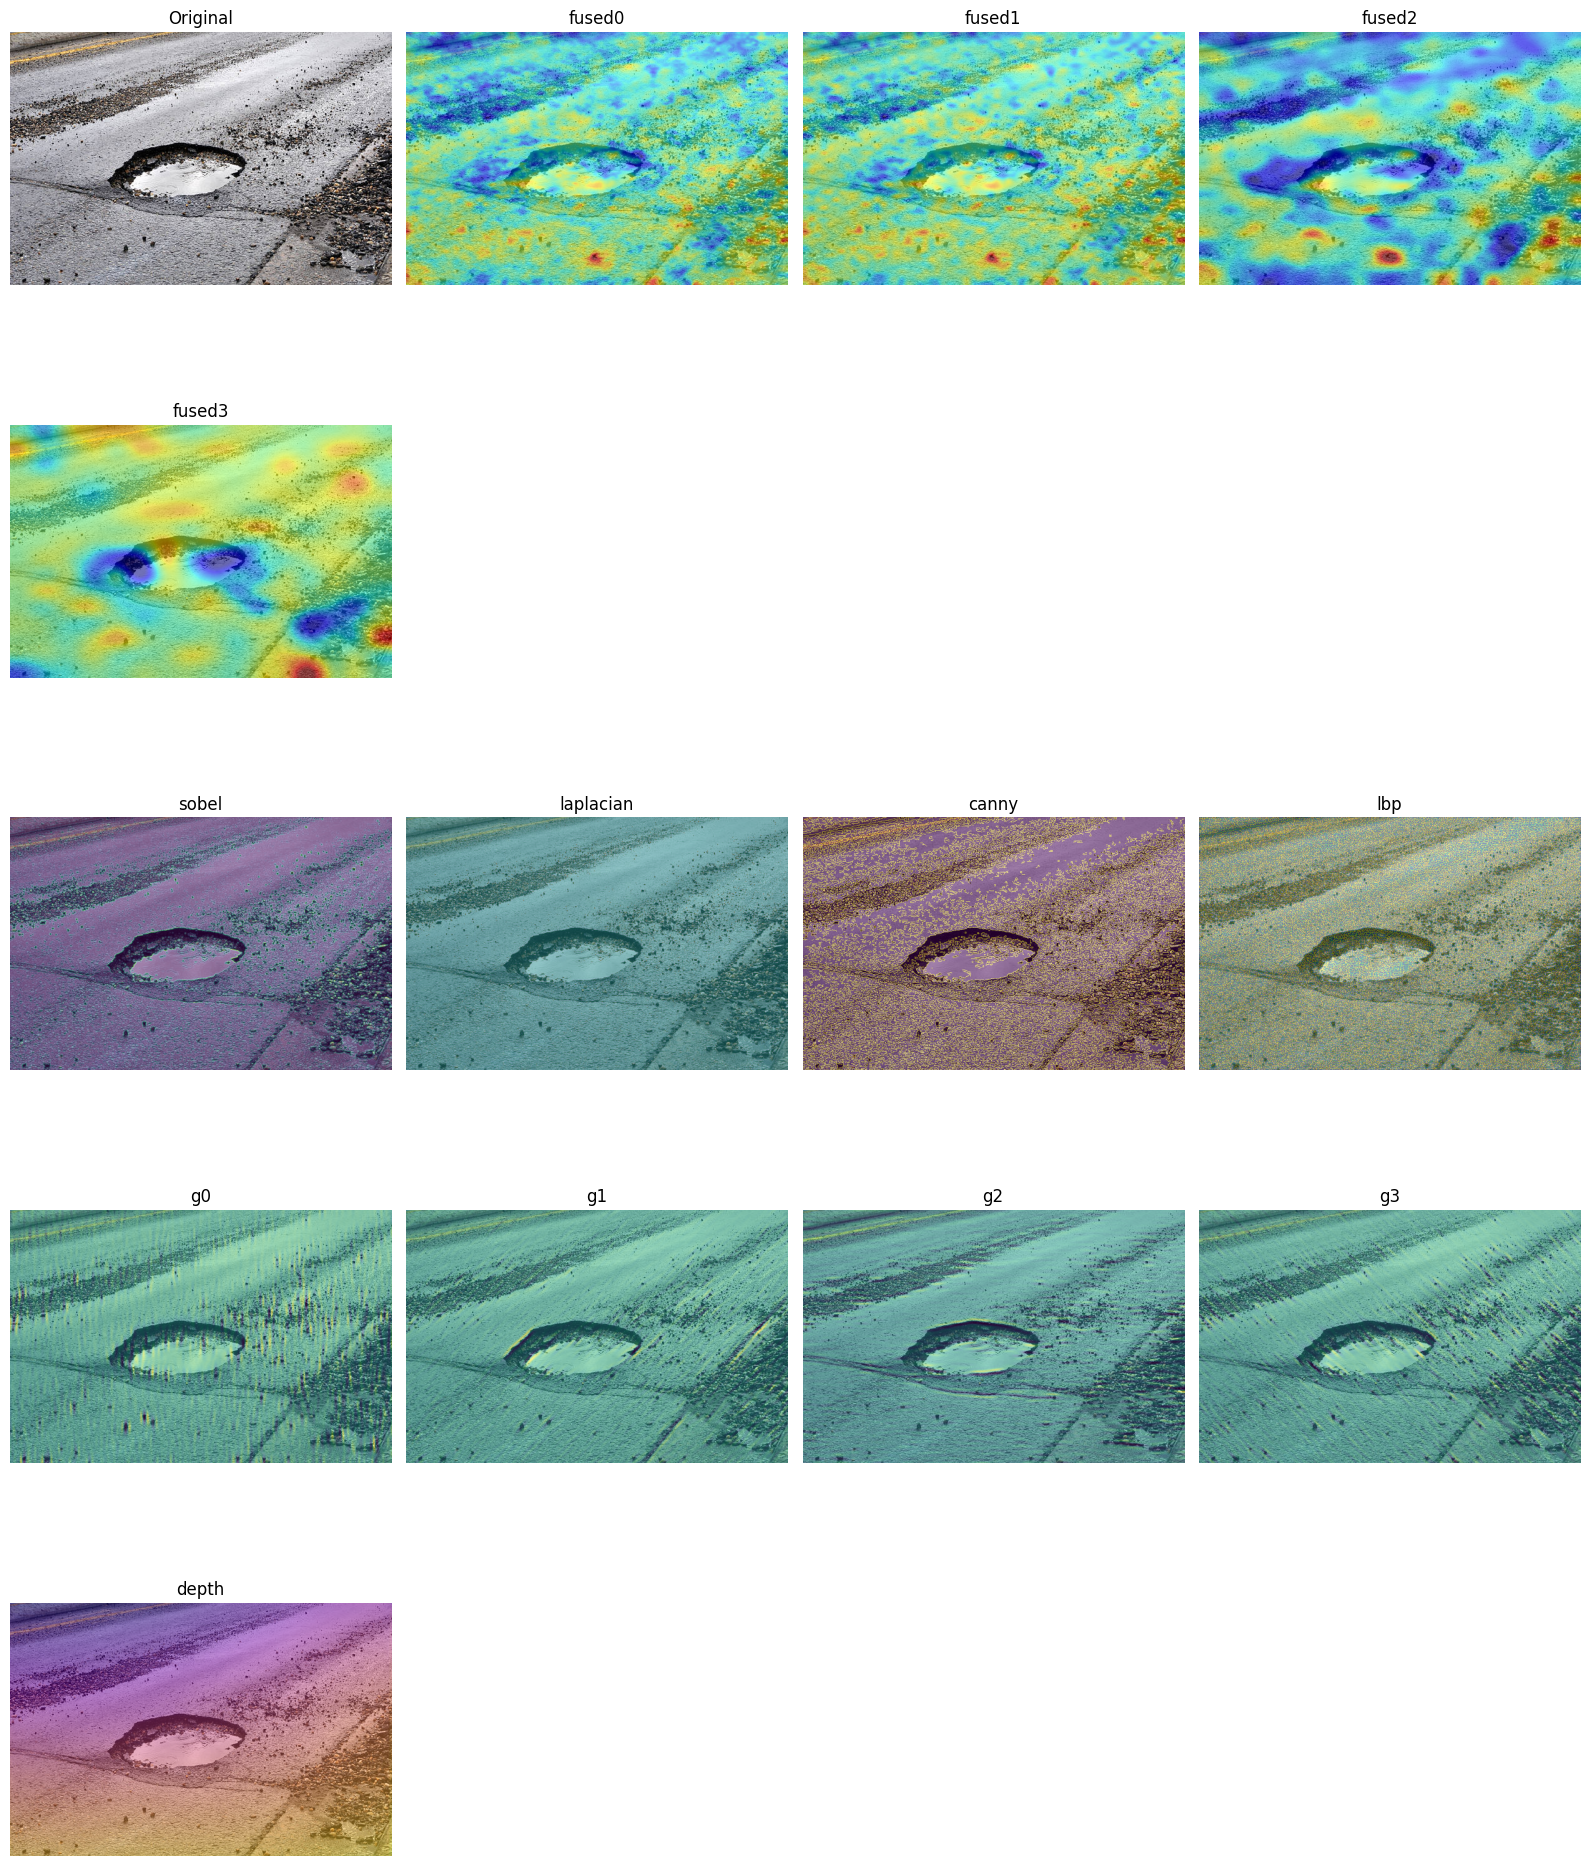

In [ ]:
# Visualize A (fused), B (low-level), C (depth) together
%cd /content/DEIMv2

import os, numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import math

# Paths (adjust if you used different names)
fused_path   = "saved_features/pothole_fused.npz"
lowlvl_path  = "saved_features/pothole_lowlevel.npz"
depth_path   = "saved_features/pothole_depth.npz"
orig_img_path = "figures/pothole_sample.jpg"   # your pothole image
out_figure = "saved_features/visualization_ab_c.png"
os.makedirs("saved_features", exist_ok=True)

# Load original image
orig = Image.open(orig_img_path).convert("RGB")
orig_np = np.array(orig)
oh, ow = orig_np.shape[:2]

# Helper: create overlay from single-channel map (0..1)
def overlay_from_map(map2d, orig_np, alpha=0.45, cmap="jet"):
    # map2d assumed 0..1; resize to orig size
    map_resized = cv2.resize(map2d.astype("float32"), (orig_np.shape[1], orig_np.shape[0]), interpolation=cv2.INTER_CUBIC)
    cmap_func = plt.get_cmap(cmap)
    heat = cmap_func(map_resized)[:,:,:3]
    heat_img = (heat * 255).astype("uint8")
    overlay = (alpha * orig_np.astype("float32") + (1-alpha) * heat_img.astype("float32")).astype("uint8")
    return heat_img, overlay

# 1) Fused maps
fused_exists = os.path.exists(fused_path)
fused_imgs = []
if fused_exists:
    fz = np.load(fused_path)
    # keys fused0..fused3, global_vec
    for i in range(4):
        key = f"fused{i}"
        if key in fz:
            fmap = fz[key]  # shape (C,H,W)
            # average channels
            if fmap.ndim == 3:
                fmap2 = fmap.mean(axis=0)
            else:
                fmap2 = fmap
            # normalize to 0..1
            fmap2 = fmap2.astype("float32")
            fmap2 = (fmap2 - fmap2.min())/(fmap2.max() - fmap2.min() + 1e-8)
            heat, over = overlay_from_map(fmap2, orig_np)
            fused_imgs.append((f"fused{i}", heat, over))
else:
    print("Fused file not found:", fused_path)

# 2) Low-level maps
low_exists = os.path.exists(lowlvl_path)
low_imgs = []
if low_exists:
    lv = np.load(lowlvl_path)
    # keys we expect: sobel, laplacian, canny, lbp, g0..g3
    keys = [k for k in ['sobel','laplacian','canny','lbp','g0','g1','g2','g3'] if k in lv]
    for k in keys:
        m = lv[k].astype("float32")
        m = (m - m.min())/(m.max() - m.min() + 1e-8)
        heat, over = overlay_from_map(m, orig_np, alpha=0.5, cmap="viridis")
        low_imgs.append((k, heat, over))

else:
    print("Low-level maps not found:", lowlvl_path)

# 3) Depth map
depth_exists = os.path.exists(depth_path)
depth_img = None
if depth_exists:
    dz = np.load(depth_path)
    if "depth" in dz:
        depth_map = dz["depth"].astype("float32")
        depth_map = (depth_map - depth_map.min())/(depth_map.max() - depth_map.min() + 1e-8)
        heat_d, over_d = overlay_from_map(depth_map, orig_np, alpha=0.55, cmap="plasma")
        depth_img = ("depth", heat_d, over_d)
else:
    print("Depth file not found:", depth_path)

# Build figure
# Layout: original + fused (4) in row, then low-level (up to 8) + depth
# --- Build figure (auto layout) ---
all_low_imgs = low_imgs.copy()
if depth_img:
    all_low_imgs.append(depth_img)

total_top = 1 + len(fused_imgs)          # original + fused maps
total_bottom = len(all_low_imgs)         # low-level + depth maps
cols = 4                                 # up to 4 per row
rows_top = math.ceil(total_top / cols)
rows_bottom = math.ceil(total_bottom / cols)
rows_total = rows_top + max(1, rows_bottom)

fig = plt.figure(figsize=(4*cols, 4*rows_total))

# Helper to add a subplot safely
def add_subplot_safe(fig, idx, rows, cols, title, img):
    ax = fig.add_subplot(rows, cols, idx)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

# --- Top section: original + fused ---
idx = 1
add_subplot_safe(fig, idx, rows_total, cols, "Original", orig_np)
idx += 1

for name, heat, over in fused_imgs:
    add_subplot_safe(fig, idx, rows_total, cols, name, over)
    idx += 1

# Fill blanks if needed
while idx <= rows_top * cols:
    ax = fig.add_subplot(rows_total, cols, idx)
    ax.axis("off")
    idx += 1

# --- Bottom section: low-level + depth ---
for name, heat, over in all_low_imgs:
    add_subplot_safe(fig, idx, rows_total, cols, name, over)
    idx += 1

plt.tight_layout()
plt.savefig(out_figure, dpi=150)
print("✅ Saved visualization to:", out_figure)
plt.show()

In [ ]:
# D: Simple Grad-CAM-like saliency (guided by deep conv features)
%cd /content/DEIMv2
import torch, numpy as np
from PIL import Image
from torchvision import transforms as T
import matplotlib.pyplot as plt
import cv2, json, os

# load model (same TimmModel wrapper)
from engine import TimmModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TimmModel(name="resnet50", return_layers=["layer1","layer2","layer3","layer4"], pretrained=True).to(device)
model.eval()

# load image and preprocess (same as before)
img_path = "figures/pothole_sample.jpg"
img = Image.open(img_path).convert("RGB")
orig_w, orig_h = img.size
transform = T.Compose([T.Resize(512), T.CenterCrop(512), T.ToTensor(),
                       T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
inp = transform(img).unsqueeze(0).to(device)

# forward & capture activations and gradients for the deepest conv (feat3)
activations = []
grads = []

def forward_hook(module, input, output):
    activations.append(output.detach())
def backward_hook(module, grad_in, grad_out):
    grads.append(grad_out[0].detach())

# register hook on the last stage conv (we need to find a module)
# here we attempt to attach to model.backbone.layer4 (adjust if path differs)
try:
    target_module = model.backbone.layer4
except Exception:
    # fallback: scan model for a module named 'layer4' or last conv
    target_module = None
    for name, m in model.named_modules():
        if name.endswith("layer4"):
            target_module = m
            break
if target_module is None:
    raise RuntimeError("Could not find target module for Grad-CAM hooks")

h1 = target_module.register_forward_hook(forward_hook)
h2 = target_module.register_full_backward_hook(backward_hook)

# forward
out = model(inp)  # list of feature maps
# create a scalar score: mean of the deepest feature map as proxy (no classifier)
score = out[-1].mean()
# backward
model.zero_grad()
score.backward()

# obtain activation and grad
act = activations[-1].squeeze(0).cpu()   # (C,H,W)
grad = grads[-1].squeeze(0).cpu()       # (C,H,W)

# channel weights = global avg of gradient per channel
weights = grad.mean(dim=(1,2))  # (C,)
cam = (weights[:,None,None] * act).sum(dim=0).numpy()
# normalize
cam = np.maximum(cam, 0)
cam = (cam - cam.min())/(cam.max()-cam.min()+1e-8)

# upsample to 512 and then crop to original and resize to orig size
cam_up = cv2.resize(cam.astype("float32"), (512,512), interpolation=cv2.INTER_CUBIC)
# assume same padding/crop scheme: center-crop used
pad_left=0; pad_top=0; resized_w,resized_h=(512,512)
crop = cam_up[pad_top:pad_top+resized_h, pad_left:pad_left+resized_w]
cam_orig = cv2.resize(crop, (orig_w, orig_h), interpolation=cv2.INTER_CUBIC)

# save overlay
orig_np = np.array(Image.open(img_path).convert("RGB"))
heatmap = plt.get_cmap("jet")(cam_orig)[:,:,:3]
heatmap_img = (heatmap*255).astype("uint8")
overlay = (0.6*orig_np + 0.4*heatmap_img).astype("uint8")
outp = "saved_features/gradcam_pothole.png"
Image.fromarray(overlay).save(outp)
print("Saved Grad-CAM overlay:", outp)

# cleanup hooks
h1.remove(); h2.remove()


/content/DEIMv2
Saved Grad-CAM overlay: saved_features/gradcam_pothole.png
